# Perceptron
$\textbf{Artifical Neuron}$
- A perceptron is a single layer neural network
- It acts as a Linear Classifier, Binary Classification
- Loss Function : Binary Cross Entropy (-ve of log Likelihood)
- Optimization: Gradient Descent/Stochastic Gredient Descent

$\textbf{Learning Goals}$
- How to implement Perceptron ?
- Understanding Vectorization, Writing efficent Code without any loop.
- What is the meaning of "Linear Classifier"

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

### Generating Datas

In [245]:
X,Y =  make_moons(n_samples = 1000 ,shuffle = True,noise = 0.2,  random_state = 1)

In [246]:
X.shape, Y.shape

((1000, 2), (1000,))

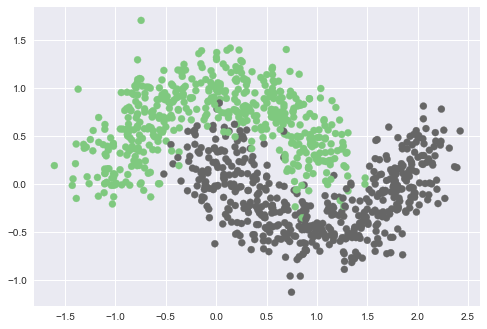

In [247]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1], c = Y, cmap = plt.cm.Accent)
plt.show()

In [248]:
# model and helper functions
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [249]:
sigmoid(np.array([1,2,3,4,5])) # sigmoid function is applied on each the element
# of the array this is called [broadcasting] 

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

### Implement percentron learning algorithm
- Learn the weights
- Reduce the loss
- Make Prediction

In [272]:
def predict(X, weights): # X(m,n+1) = matrix, W(nX1) = [w0, w1, w2.. wn] row vector
    z = np.dot(X,weights) # z = column vector
    predictions = sigmoid(z)
    return predictions

def loss(X,Y, weights):
    # loss is binary cross entropy
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate): # Wj = Wj - lr. del(j)/del(Wj); del(J)/del(Wj) = (Y_ - Y)xj
    # one wight update for 1 epoch
    Y_ = predict(X,weights)
    dw = np.dot(X.T, Y_ - Y)
    m = X.shape[0]
    weights = weights - learning_rate*dw/float((m))
    return weights

def train(X,Y,learning_rate = 0.9, maxEpochs = 100): # to repeatedly update weights
    # modify the ip to handle the bais term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    weights = np.zeros(X.shape[1]) # n+1 entries
    
    # iterate over all epochs and make updates
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights, learning_rate)
        if epoch%10 == 0:
            l = loss(X,Y, weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    return weights

In [273]:
weights = train(X,Y)

Epoch 0 Loss 0.6156
Epoch 10 Loss 0.4035
Epoch 20 Loss 0.3601
Epoch 30 Loss 0.3399
Epoch 40 Loss 0.3277
Epoch 50 Loss 0.3196
Epoch 60 Loss 0.3137
Epoch 70 Loss 0.3095
Epoch 80 Loss 0.3063
Epoch 90 Loss 0.3038


### Perceptron Implementation - Part = II
- make prediction
- visualize decision surface
- linear vs. non-linear classification

In [274]:
def getPrediction(X_test, weights, lables = True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones, X_test))
    probs = predict(X_test, weights)
    if not lables :
        return probs
    else:
        lables = np.zeros(probs.shape)
        lables[probs >= 0.5] = 1
        return lables

In [275]:
a =  np.zeros((5,5))
a[2,3] = 10
print(a)
a[a>0] = 20
print(a)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 20.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [276]:
weights

array([ 0.30480627,  1.18797089, -3.68758609])

In [277]:
x1 = np.linspace(-2,2,10)
print(x1)
x2 = -(weights[0]+weights[1]*x1)/weights[2]
x2

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]


array([-0.56165075, -0.41847116, -0.27529157, -0.13211199,  0.0110676 ,
        0.15424719,  0.29742678,  0.44060637,  0.58378596,  0.72696555])

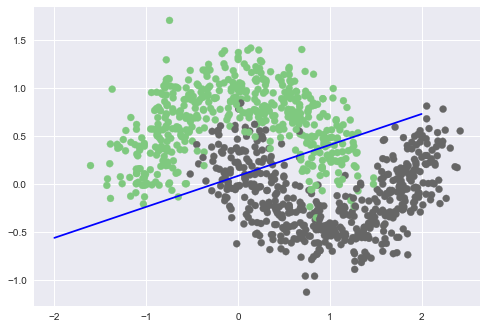

In [278]:
plt.scatter(X[:,0],X[:,1], c = Y, cmap = plt.cm.Accent)
plt.plot(x1,x2, c = 'blue')
plt.show()

$\textbf{Above decision boundary is looks straight because data was not linear data set, }$
$\textbf{to get it working with non linear datasets as well we use MLP i.e MultiLayer Perceptron}$

In [279]:
Y_pred = getPrediction(X,weights,lables = True)
print(Y_pred)
Y_pred == Y

[0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [280]:
training_accuracy = np.sum(Y_pred==Y)/Y.shape[0]
print(training_accuracy)

0.867
